<a href="https://colab.research.google.com/github/saghar-trade/TEXT-MINING/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd

In [38]:
df_twt=pd.read_csv('train_E6oV3lV.csv')
df_twt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
df_twt.label.unique()

array([0, 1])

In [40]:
df_twt.label.value_counts()

,count
label,
0,29720
1,2242


In [41]:
import matplotlib.pyplot as plt

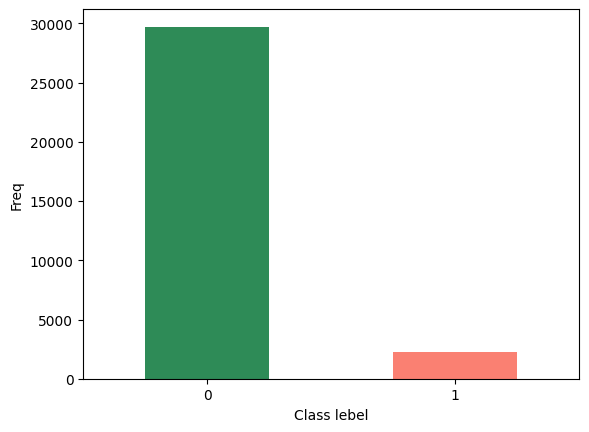

In [42]:
y_value_count=df_twt.label.value_counts()
y_value_count.plot(kind='bar', color=['seagreen', 'salmon'])
plt.xlabel('Class lebel')
plt.ylabel('Freq')
plt.xticks(rotation=0);



In [43]:
!pip install contractions

In [44]:
import contractions

df_twt['cont_tweet'] = df_twt['tweet'].apply(lambda x: contractions.fix(x))

In [45]:

df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('@user','')
df_twt

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use because...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [46]:

df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace(r'[^a-zA-Z#]', ' ', regex=True)
df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('#','')
df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('http\S+|www.\S+', '', regex=True)
df_twt


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-2070657424.py:3: SyntaxWarning: invalid escape sequence '\S'
  df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('http\S+|www.\S+', '', regex=True)


,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use because ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love you take with you all the time ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso con...


In [47]:
#get most common word in training darraset
from collections import Counter
all_words=[]
for line in list(df_twt['cont_tweet']):
    words=line.split()
    for word in words:
        all_words.append(word.lower())
counter_all_words=Counter(all_words).most_common(10)


In [48]:
#tokenization

df_twt['cont_tweet']=df_twt['cont_tweet'].astype(str).apply(lambda x: x.split())
df_twt.head()


,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, cannot, use, be..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, you, take, with, you, all, th..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [49]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: [stemmer.stem(word) for word in x])
df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, cannot, use, bec..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, you, take, with, you, all, th..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: [word for word in x if word not in stop_words])

In [52]:
import string

df_twt['cont_tweet'] = df_twt['cont_tweet'].apply(
    lambda tokens: [w.strip(string.punctuation) for w in tokens if w.strip(string.punctuation)]
)

df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunct, selfish, drag, kid, dysfunc..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, cannot, use, becaus, off..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, take, time]"
4,5,0,factsguide: society now #motivation,"[factsguid, societi, motiv]"


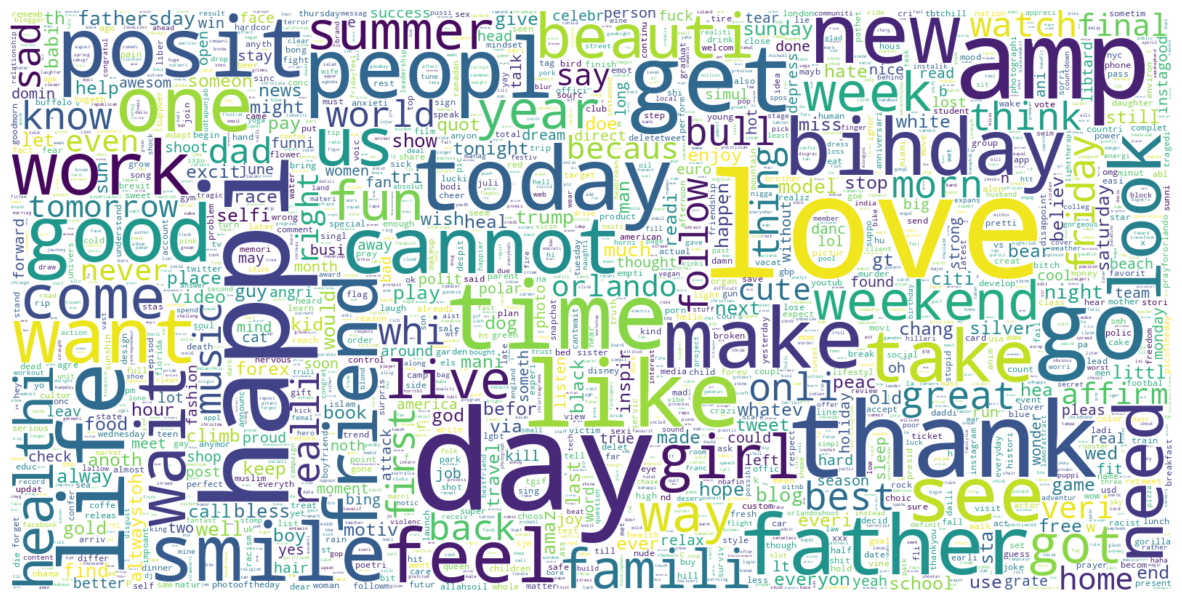

In [53]:
from wordcloud import WordCloud
words=[]
for line in df_twt['cont_tweet']:
  words.extend(line)
#create a word frequency dictionary
wordferq=Counter(words)
#draw a word cloud with word frequencies
wordcloud=WordCloud(background_color='white',max_words=2000,stopwords=stopwords,width=1600, height=800, max_font_size=200).generate_from_frequencies(wordferq)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
def string(text):
  to_return=''
  for word in text:
    to_return=to_return+' '+word
  return to_return
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: string(x))
df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cannot use becaus offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love take time
4,5,0,factsguide: society now #motivation,factsguid societi motiv


In [55]:
positve=[r for r in df_twt['cont_tweet'][df_twt['label']==1]]
pos=''.join(positve)
negative=[r for r in df_twt['cont_tweet'][df_twt['label']==0]]
neg=''.join(negative)

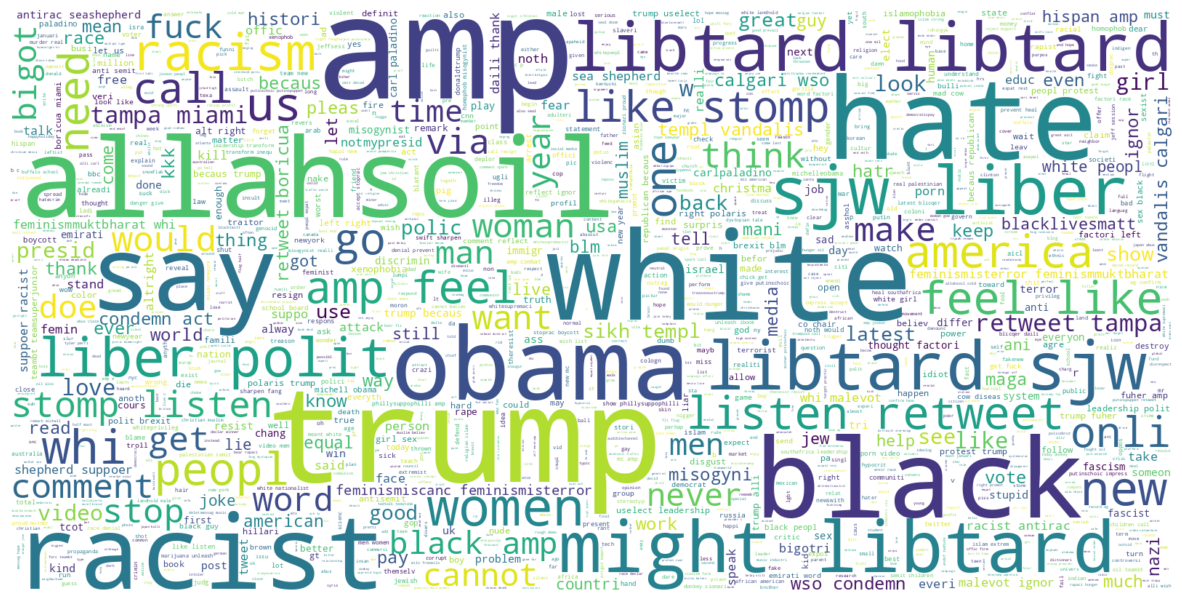

In [56]:
wordcloud=WordCloud(background_color='white',max_words=2000,stopwords=stop_words
                    ,width=1600, height=800,
                    max_font_size=200).generate(pos)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

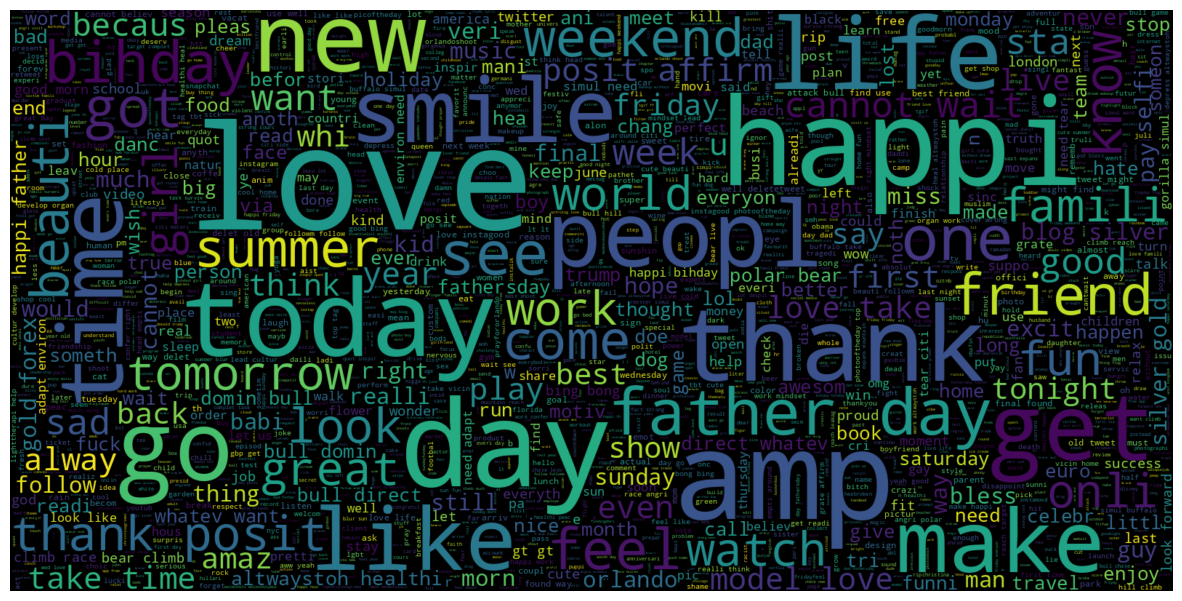

In [57]:
wordcloud=WordCloud(background_color='black',max_words=2000,stopwords=stop_words
                    ,width=1600, height=800,
                    max_font_size=200).generate(neg)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
df_twt.drop(['id','tweet'],axis=1,inplace=True)
df_twt.head()

,label,cont_tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit cannot use becaus offer whe...
2,0,bihday majesti
3,0,model love take time
4,0,factsguid societi motiv


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_twt['cont_tweet'],df_twt['label'], test_size=0.2, random_state=42)
print('tarining set:',x_train.shape,y_train.shape)
print('testing set:',x_test.shape,y_test.shape)


tarining set: (25569,) (25569,)
testing set: (6393,) (6393,)


In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vector=CountVectorizer(stop_words='english')
transformer=TfidfTransformer(norm='l2',sublinear_tf=True)


In [61]:
x_train_count=count_vector.fit_transform(x_train)
x_train_tfidf=transformer.fit_transform(x_train_count)
print(x_train_count.shape)

(25569, 27248)


In [62]:
x_test_count=count_vector.transform(x_test)
x_test_tfidf=transformer.transform(x_test_count)
print(x_test_count.shape)

(6393, 27248)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [64]:
print("Train shape:", x_train_tfidf.shape)
print("Test shape :", x_test_tfidf.shape)
print("Model expects:", model.n_features_in_)

Train shape: (25569, 27248)
Test shape : (6393, 27248)
Model expects: 27248


In [65]:
prediction=model.predict(x_test_tfidf)
print(accuracy_score(y_test,prediction))

0.9605818864382919


In [66]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y_test,prediction)

array([[5898,   39],
       [ 213,  243]])

In [67]:
f1_score(y_test,prediction)

0.6585365853658537

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression()

In [70]:
log_prediction=logmodel.predict(x_test_tfidf)

In [71]:
confusion_matrix(y_test,log_prediction)

array([[5925,   12],
       [ 307,  149]])

In [72]:
f1_score(y_test,log_prediction)

0.4829821717990275

In [73]:
accuracy_score(y_test,log_prediction)

0.9501016737056155

In [74]:
!pip install xgboost

In [75]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [76]:
xgb_prediction=xgb_model.predict(x_test_tfidf)

In [77]:
confusion_matrix(y_test,xgb_prediction)

array([[5890,   47],
       [ 257,  199]])

In [78]:
f1_score(y_test,xgb_prediction)

0.5669515669515669

Imbalance Handling

In [81]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train_tfidf,y_train)
print(y_resampled.value_counts())

label
1    23783
0    23783
Name: count, dtype: int64


In [82]:
model=RandomForestClassifier(n_estimators=200)
model.fit(x_resampled,y_resampled)


RandomForestClassifier(n_estimators=200)

In [83]:
predictions=model.predict(x_test_tfidf)
f1_score(y_test,predictions)

0.6787741203178207

In [84]:
xgb_model.fit(x_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_prediction=xgb_model.predict(x_resampled)

In [86]:
f1_score(y_test,xgb_prediction)

0.5669515669515669